# **NBA Anaysis: Visualisations in Matplotlib**

## Objectives

* Load output data set produced in 04_etl_b.ipynb: nba-data-1980plus.csv
Produce some visualisations with this data.

## Inputs

* Files used: 
nba-data-1980plus.csv


## Outputs

* File produced:


## Additional Comments

* This dataset contains essential information about the wins, losses, and other statistics for each MVP candidate from 1980-2018
* Note: columns listed in this dataset did not have any information, some have been gleaned from the column titles and listed below where known or not obvious from the column title.

Rank: MVP rank, 1 denotes the winner
Player: Name of player in the format <First Name> < Last Name>
Age: Age at time of award
Tm: Short name of team, eg. LAL = LA Lakers
First: Number of first place votes
Pts Won: Number of voting points won
Pts Max: Maximum number of points possible
Share: Number of voting points as a percentage of the maximum number of points possible
G: Number of games played in the regular season (Regular seasons are 82 games apart from shortened seasons eg. player strike, pandemic etc)
MP: Mean minutes played per game
PTS: Mean number of points scored per game
TRB: Mean number of rebounds per game (includes both offensive and defensive rebounds)
AST: Mean number of assists per game
STL: Mean number of steals per game
BLK: Mean number of blocks per game
FG%: Field goal percentage (number of shots scored divided by the number of shots taken)
3P%: 3 Point percentage (number of 3 point shots scored divided by the number of 3 point shots taken)
FT%: Free throws percentage (number of free throws scored divided by the number of free throws taken)
WS: Win share
WS/48: Win share per 48 minutes
year: The year of the award
team: Full name of the team eg. Philadelphia 76ers
W: Number of games won
W/L%: Number of regular season games won (the number of games won divided by the number of games in the season, usually 82 games)
seed: presume to be seeding of the team in their Conference at the end of the season. The lowest number has won the most games.
player_efficiency_rating:
true_shooting_percentage: Takes into account all shooting statistics, field goals 3 pointers and free throws
three_point_attempt_rate
free_throw_attempt_rate
offensive_rebound_percentage
defensive_rebound_percentage: 
total_rebound_percentage
assist_percentage
steal_percentage
block_percentage
turnover_percentage
usage_percentage
offensive_win_shares
defensive_win_shares
win_shares
win_shares_per_48_minutes
offensive_box_plus_minus
defensive_box_plus_minus
box_plus_minus
value_over_replacement_player

* Note: data set has records from 1980-2018.




---

# Section 1

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns


# Load the dataset

In [2]:
df = pd.read_csv("../data/outputs/nba-data-1980plus.csv")

# Look at data

In [3]:
df.head()


,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,Name,Surname,First_Name
0,1,Kareem Abdul-Jabbar,32,LAL,147.0,147.0,221,0.665,82,38.3,...,5.3,14.8,0.227,4.8,2.4,7.2,7.3,Kareem,Abdul-Jabbar,K.
1,2,Julius Erving,29,PHI,31.5,31.5,221,0.143,78,36.1,...,5.2,12.5,0.213,5.7,1.9,7.6,6.8,Julius,Erving,J.
2,3,George Gervin,27,SAS,19.0,19.0,221,0.086,78,37.6,...,1.3,10.6,0.173,5.5,-1.6,3.9,4.4,George,Gervin,G.
3,4,Larry Bird,23,BOS,15.0,15.0,221,0.068,82,36.0,...,5.6,11.2,0.182,3.0,1.5,4.5,4.8,Larry,Bird,L.
4,5T,Tiny Archibald,31,BOS,2.0,2.0,221,0.009,80,35.8,...,2.9,8.9,0.148,1.4,-0.3,1.1,2.3,Tiny,Archibald,T.


# Look at shape

In [4]:
df.shape

(642, 48)

# Check data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           642 non-null    object 
 1   Player                         642 non-null    object 
 2   Age                            642 non-null    int64  
 3   Tm                             642 non-null    object 
 4   First                          642 non-null    float64
 5   Pts Won                        642 non-null    float64
 6   Pts Max                        642 non-null    int64  
 7   Share                          642 non-null    float64
 8   G                              642 non-null    int64  
 9   MP                             642 non-null    float64
 10  PTS                            642 non-null    float64
 11  TRB                            642 non-null    float64
 12  AST                            642 non-null    flo

# Check null values

In [6]:
df.isnull().sum()

Rank                             0
Player                           0
Age                              0
Tm                               0
First                            0
Pts Won                          0
Pts Max                          0
Share                            0
G                                0
MP                               0
PTS                              0
TRB                              0
AST                              0
STL                              0
BLK                              0
FG%                              0
3P%                              0
FT%                              0
WS                               0
WS/48                            0
year                             0
team                             0
W                                0
W/L%                             0
seed                             0
player_efficiency_rating         0
true_shooting_percentage         0
three_point_attempt_rate         0
free_throw_attempt_r

# Check for duplicates

In [7]:
df.duplicated().sum()

0

---

# Section 2

# A visualisation in Matplolib of number of MVPs per position in our dataset of : "Guard", "Center", "Forward". We need to count how many are in each position.
# Note that guards are usually broken down into 2 guard positions, Point Guard and Shooting Guard with different emphasis on utility on a team, but this can change depending on the ability of the player. Eg. Allen Iverson was MVP in the year 2000 and at 1.83m his natural position was Point Guard - usually a facilitator creating the play. Iverson was ore like a Shooting Guard combined with Point Guard, carrying the ball up the court but also taking the most number of shots for his team.
# Forwards are broken down into Small Forward and Power Forward (usually larger than the Small Forward). The way the game has evolved it can be that there are just guards and forwards and centers are not the traditional "rim protectors" of the past due to the increase in 3 point shooting as time has gone on.

# Count totals for each unique position. We know there are 3 - Guard, Forward, Center

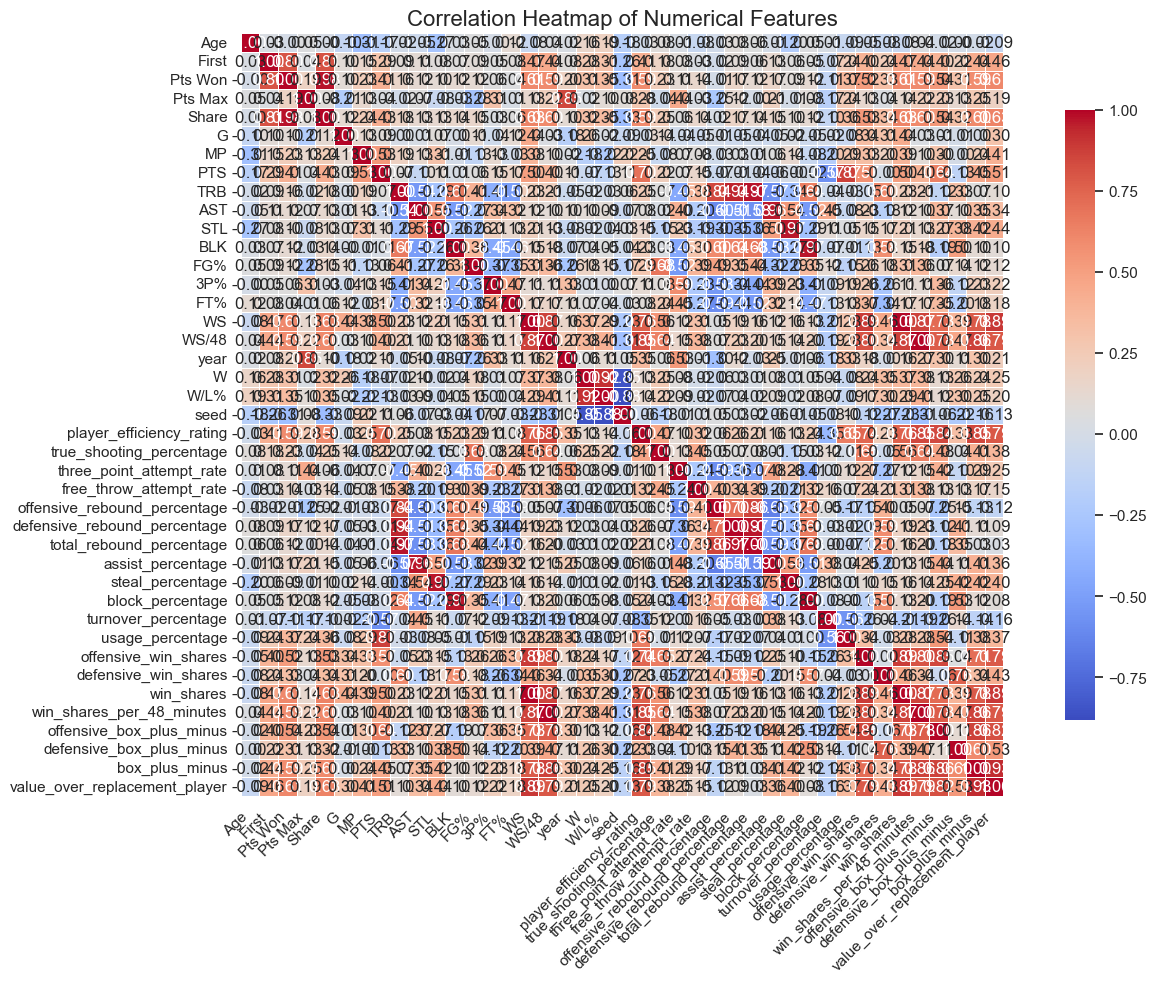

In [8]:
# Select only numerical features
numerical_df = df.select_dtypes(include='number')

# Compute full correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.set(style="white")

heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

# Title and formatting
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

# Create a visualistion to show the breakdown. For these 3 positions, a pie chart is an easy way to see the breakdown.

# Save the pie chart as an image file in the ../data/outputs/images folder
# Saved as png file but other image formats are also available
# dpi=300 for high-resolution output
# bbox_inches='tight' trims extra whitespace

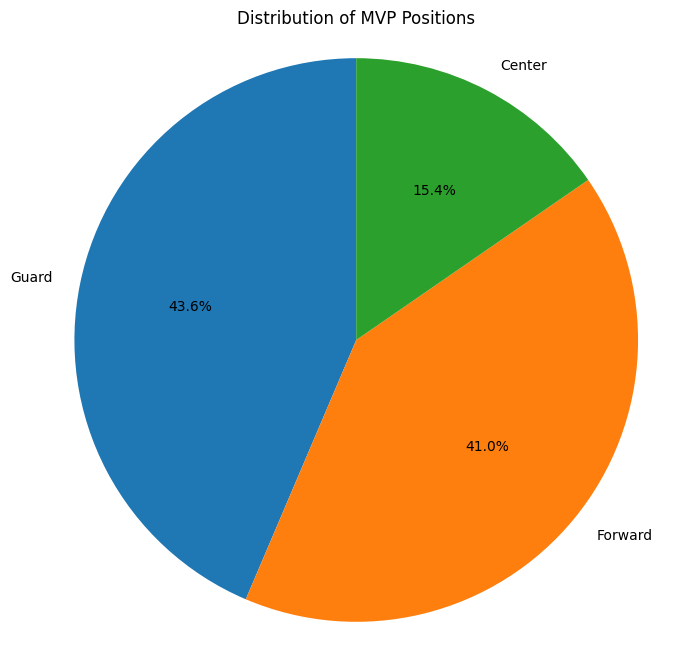

In [26]:
# Create a pie chart to visualize the distribution of MVP positions
plt.figure(figsize=(8, 8))

#  Plotting the pie chart, add percentage labels and ensure the pie chart is circular
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of MVP Positions')
plt.axis('equal')  # Ensures pie is a circle

# Save pie chart as image file (PNG)
plt.savefig('../data/outputs/images/mvp_position_pie_chart.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()



# Plot the same information but this time as a bar chart and save to an image file.

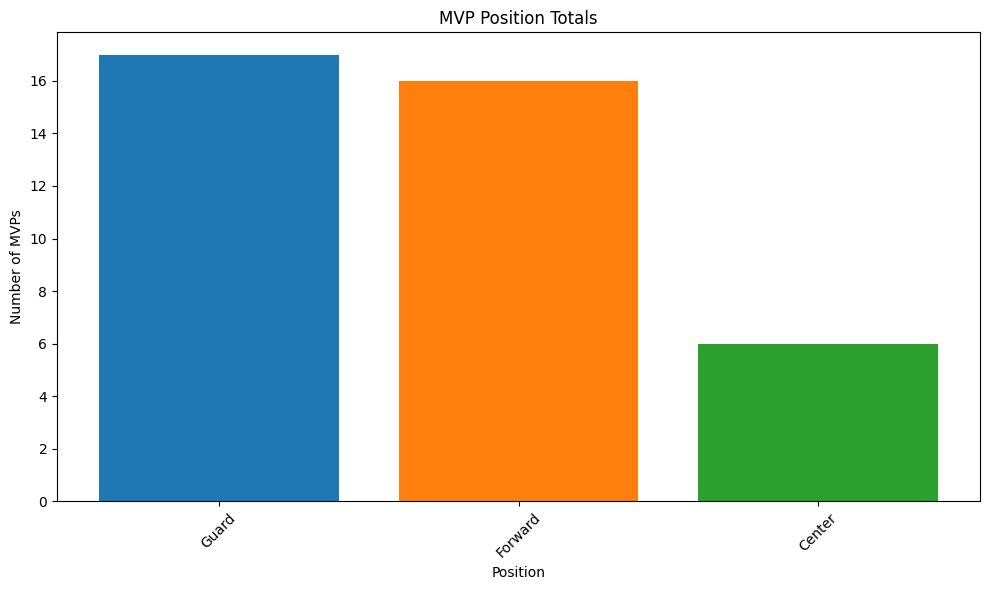

In [36]:
# Define custom colors for each position
color_map = {
    'Guard': '#1f77b4',    # Blue
    'Forward': '#ff7f0e',  # Orange
    'Center': '#2ca02c'    # Green
}

# Extract colors in the same order as position_counts
bar_colors = [color_map[pos] for pos in position_counts.index]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(position_counts.index, position_counts.values, color=bar_colors)
plt.title('MVP Position Totals')
plt.xlabel('Position')
plt.ylabel('Number of MVPs')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart as an image file
plt.savefig('../data/outputs/images/mvp_position_bar_chart.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()

# Create the same bar chart but with the positions listed inside the bars, which are big enough and would look better. The colours were already defined in the previous chart, we will use them again here for consistency.

# height / 2 places the label vertically centered.
# ha='center', va='center' aligns the text in the middle of the bar.
# color='white' for a contrasting colour


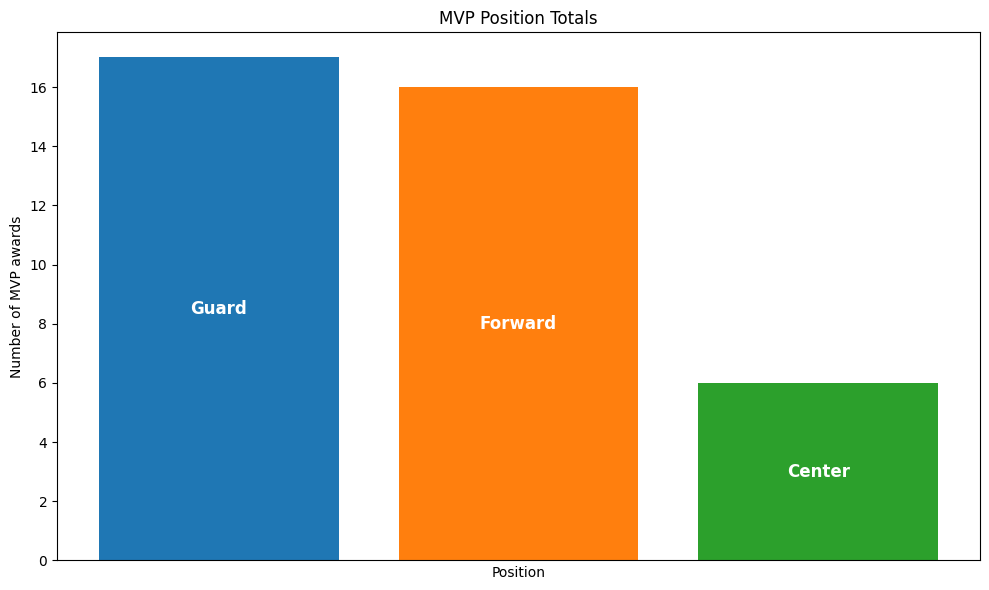

In [37]:
# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(position_counts.index, position_counts.values, color=bar_colors)
plt.title('MVP Position Totals')
plt.xlabel('Position')
plt.ylabel('Number of MVP awards')
#plt.xticks(rotation=45) # Rotates x-axis labels for better readability
plt.xticks([])  # Removes tick labels

plt.tight_layout()

# Add position names inside the bars
for bar, label in zip(bars, position_counts.index):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,  # halfway up the bar
        label,
        ha='center',
        va='center',
        color='white',
        fontsize=12,
        fontweight='bold'
    )

# Save the chart
plt.savefig('../data/outputs/images/mvp_position_bar_chart_labeled_inside.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()

# Create the same bar chart, this time horizontal, but with the positions and MVP count listed inside the bars. The colours were already defined in the previous chart, we will use them again here for consistency.

# hide y-axis labels, these are self-explanatory in the chart due to the position name inside the bar.
# use the same 3 colours for position for consistency
# color='white' for a contrasting colour

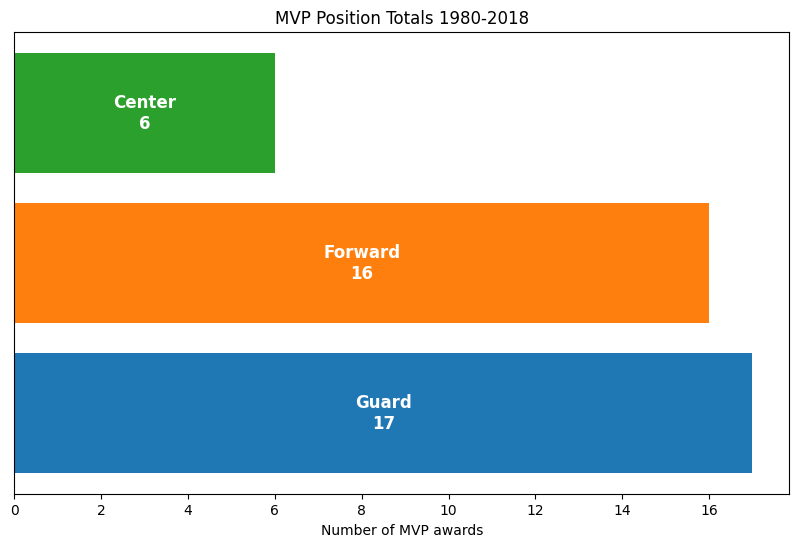

In [38]:
# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(position_counts.index, position_counts.values, color=bar_colors)
plt.title('MVP Position Totals 1980-2018')
plt.xlabel('Number of MVP awards')

# Hide y-axis ticks and labels (optional)
plt.yticks([])  # Removes tick labels
plt.tick_params(axis='y', left=False)  # Removes tick marks

# Add position name and count inside each bar
for bar, label, count in zip(bars, position_counts.index, position_counts.values):
    plt.text(
        count / 2,                      # x-position (center of bar)
        bar.get_y() + bar.get_height() / 2,  # y-position (center of bar)
        f'{label}\n{count}',           # label text
        ha='center',
        va='center',
        color='white',
        fontsize=12,
        fontweight='bold'
    )

# Save and show the chart
plt.savefig('../data/outputs/images/mvp_position_horizontal_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

# Co-pilot suggested that the bar chart can be animated. This is an attempt to animate the above horizontal bar chart.

# Create the same bar chart, this time horizontal, but with the positions and MVP count listed inside the bars. The colours were already defined in the previous chart, we will use them again here for consistency.

# hide y-axis labels, these are self-explanatory in the chart due to the position name inside the bar.
# use the same 3 colours for position for consistency
# color='white' for a contrasting colour

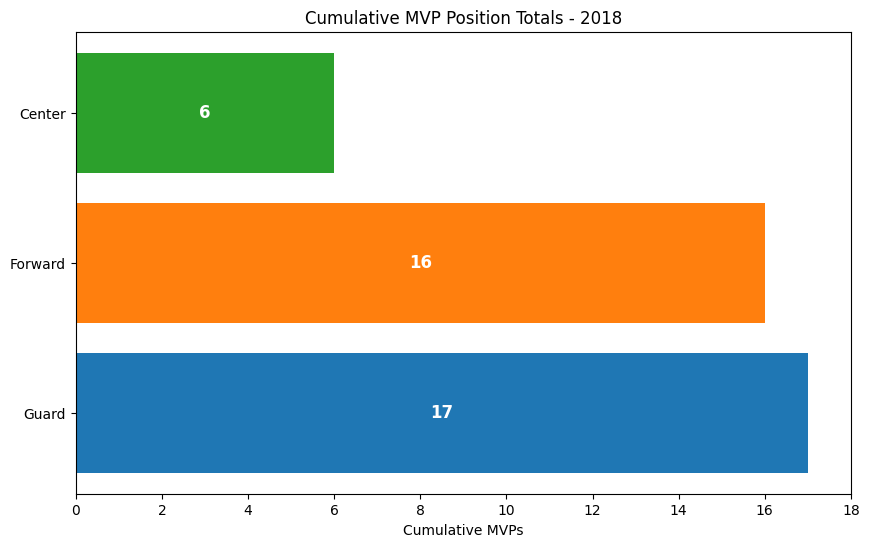

In [ ]:
# Sort by year to ensure proper accumulation
df = df.sort_values('Year')

# Create cumulative counts by year and position
cumulative = (
    df.groupby(['Year', 'MVP Position'])
    .size()
    .unstack(fill_value=0)
    .cumsum()
)

# To keep the same order of positions in the chart with the colours used previously
positions = ['Guard', 'Forward', 'Center']
colors = {
    'Guard': '#1f77b4',
    'Forward': '#ff7f0e',
    'Center': '#2ca02c'
}

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, cumulative.values.max() + 1)
ax.set_xlabel('Cumulative MVPs')

def update(frame):
    ax.clear()
    year = cumulative.index[frame]
    counts = cumulative.loc[year, positions]

    # Draw horizontal bars
    bars = ax.barh(positions, counts.values, color=[colors[pos] for pos in positions])

    # Axis settings
    ax.set_xlim(0, cumulative.values.max() + 1)
    ax.set_xlabel('Cumulative MVPs')
    ax.set_title(f'Cumulative MVP Position Totals - {year}')
    ax.set_yticks(range(len(positions)))
    ax.set_yticklabels(positions)

    # Add counts inside bars
    for bar, count in zip(bars, counts.values):
        ax.text(
            count / 2,
            bar.get_y() + bar.get_height() / 2,
            str(count),
            ha='center',
            va='center',
            color='white',
            fontsize=12,
            fontweight='bold'
        )
    return bars

# Create animation
ani = animation.FuncAnimation(
    fig, update, frames=len(cumulative), repeat=False, interval=800
)

# Save animation as gif (pillow) or MP4 (requires ffmpeg installed) - note that it is better to view the gif file to see the animation easily.
ani.save('../data/outputs/images/cumulative_mvp_position_over_time.gif', writer='pillow', dpi=300)

plt.show()

# Make a scatter type chart showing the height of the winning MVP by year, with the 3 colours indicating their position

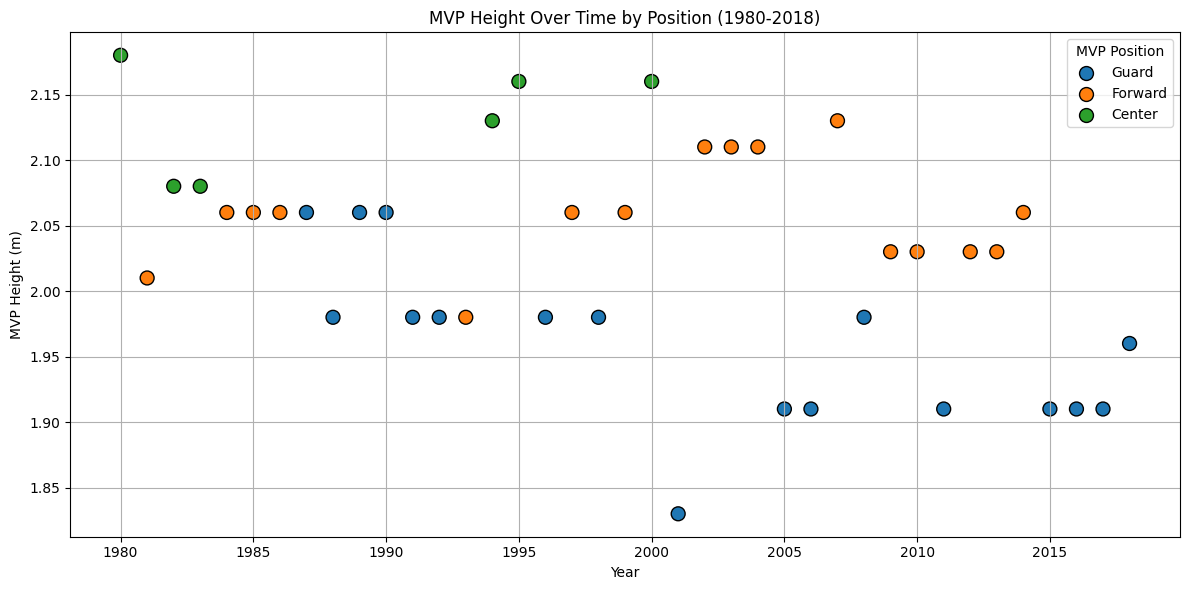

In [ ]:
# Map colours to each row - colour map was defined earlier
df['Color'] = df['MVP Position'].map(color_map)

# Create the plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['MVP Height (m)'], c=df['Color'], s=100, edgecolors='black')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('MVP Height (m)')
plt.title('MVP Height Over Time by Position (1980-2018)')

# Add legend to show the viewer which colour corresponds to which position
for position, color in color_map.items():
    plt.scatter([], [], c=color, label=position, s=100, edgecolors='black')
plt.legend(title='MVP Position')

plt.grid(True)
plt.tight_layout()

#save to an external png image file
plt.savefig('../data/outputs/images/mvp_height_by_position.png', dpi=300)

#show the plot
plt.show()

# A bar chart showing the total number of MVP awards by team in our time period of 1980-2018

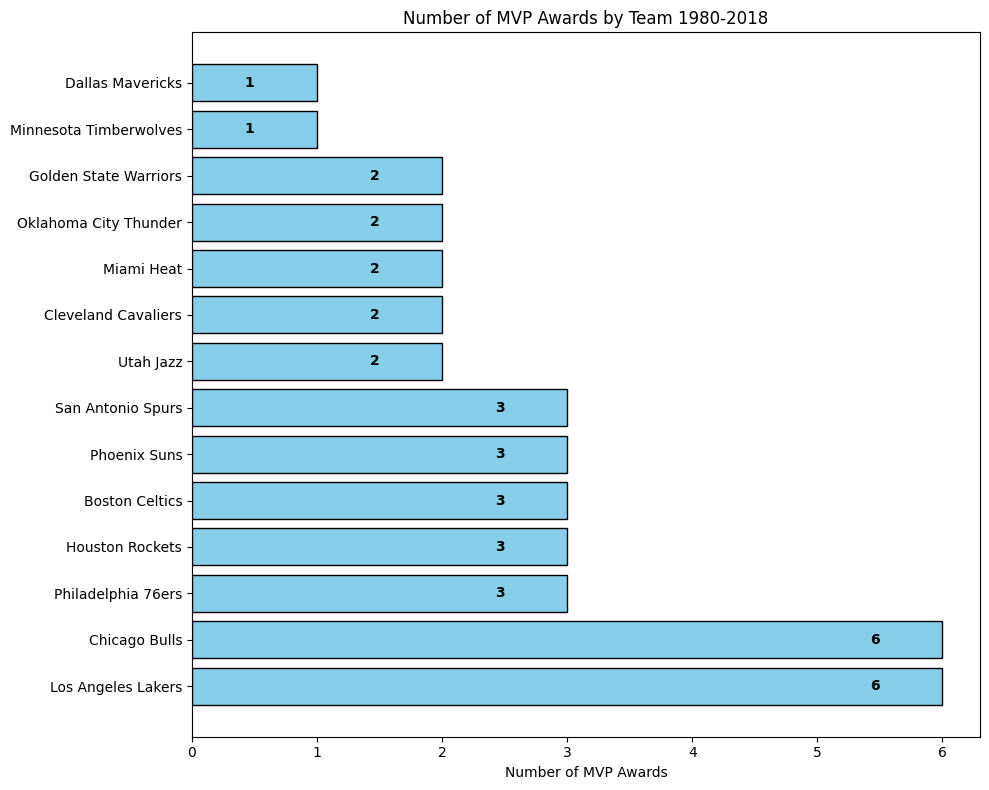

In [70]:
# Count MVP wins by team
team_counts = df['MVP Team'].value_counts()

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(team_counts.index, team_counts.values, color='skyblue', edgecolor='black')

# Add chart labels and title
plt.xlabel('Number of MVP Awards')
plt.title('Number of MVP Awards by Team 1980-2018')
plt.tight_layout()

# Add counts inside bars
for bar, count in zip(bars, team_counts.values):
    plt.text(
        count - 0.5,  # x-position
        bar.get_y() + bar.get_height() / 2,  # y-position
        str(count),
        ha='right',
        va='center',
        color='black',
        fontsize=10,
        fontweight='bold'
    )

# Save and show the chart
plt.savefig('../data/outputs/images/mvp_awards_by_team.png', dpi=300, bbox_inches='tight')
plt.show()

# A bar chart of whether the regular season MVP award winner won the NBA Championship, reached the finals ("Vice-Champion") or whether they did not reach the final.

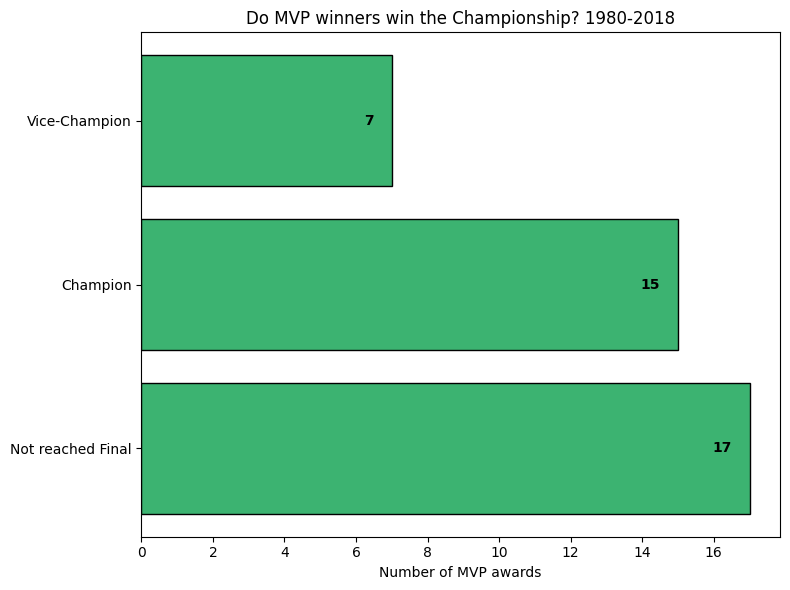

In [71]:
# Count MVPs by status
status_counts = df['MVP status'].value_counts()

# Create the horizontal bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(status_counts.index, status_counts.values, color='mediumseagreen', edgecolor='black')

# Add chart labels and title
plt.xlabel('Number of MVP awards')
plt.title('Do MVP winners win the Championship? 1980-2018')
plt.tight_layout()

# Add counts inside bars
for bar, count in zip(bars, status_counts.values):
    plt.text(
        count - 0.5,
        bar.get_y() + bar.get_height() / 2,
        str(count),
        ha='right',
        va='center',
        color='black',
        fontsize=10,
        fontweight='bold'
    )

# Save and show the chart
plt.savefig('../data/outputs/images/mvp_final_status_totals.png', dpi=300, bbox_inches='tight')
plt.show()

# Chart to show the nationality of the MVP winner

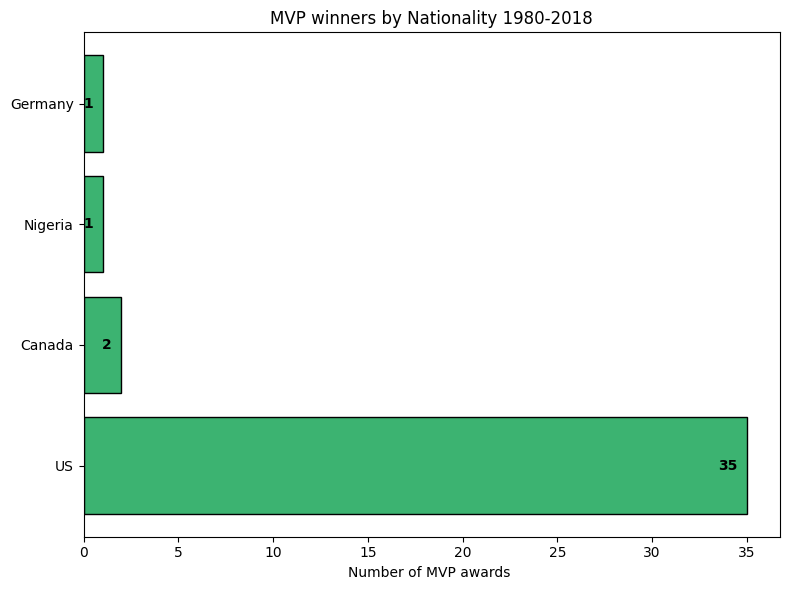

In [72]:
# Count MVPs by status
nation_counts = df['MVP Nationality'].value_counts()

# Create the horizontal bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(nation_counts.index, nation_counts.values, color='mediumseagreen', edgecolor='black')

# Add chart labels and title
plt.xlabel('Number of MVP awards ')
plt.title('MVP winners by Nationality 1980-2018')
plt.tight_layout()

# Add counts inside bars
for bar, count in zip(bars, nation_counts.values):
    plt.text(
        count - 0.5,
        bar.get_y() + bar.get_height() / 2,
        str(count),
        ha='right',
        va='center',
        color='black',
        fontsize=10,
        fontweight='bold'
    )

# Save and show the chart
plt.savefig('../data/outputs/images/mvp_nationality_totals.png', dpi=300, bbox_inches='tight')
plt.show()

# Note: The nationality of the MVP winner may be changing. From the 2018-2019 season until now (the 2024-25 season), no American has won the MVP award. A Greek has won it twice, a Serbian 3 times, a Cameroonian and most recently, a Canadian.

Note: an aside, before 1980, the Center position had won all but 4 MVP awards, so it is interesting to see how the Guard and Forward positions have won more MVP awards since 1980. The pre-1980 data may be due to the dominance of All-Time Great Centers in Bill Russell (11 Championships, a record), Wilt Chamberlain (many individual records but usually beaten in the Finals by Russell), and Kareem Abdul-Jabbar amongst others.

From the 1987, guards became regular MVP winners, due Magic Johnson and Michael Jordan. Earvin "Magic" Johnson was the architect of the "Showtime" Los Angeles Lakers with an arsenal of "no look" passes and unparalleled court vision due to having the size of a Forward (at 6'9). Isiah Thomas, one of the best point guards of the time and an All-Time Great noted that Magic Johnson had the same passing lanes as everyone else but 1 more, above the defenders head because he was taller than everyone in his position (usually 6' - 6'4). Michael Jordan won 5 MVP awards and was the normal height for his position (6'6), and a very spectacular player, who said he'd admired forward Julius "Dr. J" Erving, himself a previous MVP winner. Jordan performed similar high-flying feats while being the top scorer in the league for 10 years, combined with being the best defensive player in his position.

After the year 2000, when Shaquille "Shaq" O'Neal won the MVP award, no center has won it since. Does this show a change in the rules to deal with Shaq's dominance ? Or does it show a change in tactics over time with the emphasis on other positions ? For future investigation, we could look into how the positions have changed and how they are played now than they were in previous decades. We now see some centers take 3 point shots, while in the past they stayed near the ring to block shots and get rebounds to start attacks. 

The data used here ends in 2018, but interestingly a 6'11 forward (who can also play center) won the award twice in consecutive seasons. Centers dominated for the next 4 years, with a Serbian winning 3 of those, and 1 for a Cameroonian. In the most recent season (2024-25), a Canadian guard (who has been compared in style of play to Michael Jordan) has won the award as well as the Championship.

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
